<h2 style="color: #1E90FF">Projeto: Análises Preditiva de dados</h2>

<h3 style="color: #6495ED">1. Definição do projeto e Instalação de Bibliotecas</h3>

<h3 style="color: #00BFFF">Etapas do Projeto:</h3>

1. Definição do projeto e Instalação de Bibliotecas;
2. Carregar e visualisar dados;
3. Análises Exploratória de Dados;
4. Análise Estatística de Dados;
5. Análise Gráfica dos dados;
6. Análise gráfica Automaticamente.

In [14]:
import yfinance as yf
import pandas as pd

<h3 style="color: #00BFFF">2. Carregar e visualisar dados</h3>

In [7]:
ticker = input("Digite o código da ação: ")
dados = yf.Ticker(ticker).history("2y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-09 00:00:00-03:00,17.565437,17.846081,17.443105,17.694965,33978200,0.0,0.0
2023-05-10 00:00:00-03:00,17.694966,17.860474,17.507870,17.651791,41500700,0.0,0.0
2023-05-11 00:00:00-03:00,17.363948,18.335408,17.220029,18.299429,136878100,0.0,0.0
2023-05-12 00:00:00-03:00,18.407371,19.242107,18.335411,18.889503,117237500,0.0,0.0
2023-05-15 00:00:00-03:00,18.752779,18.817543,18.277843,18.464939,81996700,0.0,0.0


In [11]:
dados.Close

Date
2023-05-09 00:00:00-03:00    17.694965
2023-05-10 00:00:00-03:00    17.651791
2023-05-11 00:00:00-03:00    18.299429
2023-05-12 00:00:00-03:00    18.889503
2023-05-15 00:00:00-03:00    18.464939
                               ...    
2025-05-05 00:00:00-03:00    29.660000
2025-05-06 00:00:00-03:00    30.150000
2025-05-07 00:00:00-03:00    30.290001
2025-05-08 00:00:00-03:00    30.709999
2025-05-09 00:00:00-03:00    30.969999
Name: Close, Length: 500, dtype: float64

<Axes: xlabel='Date'>

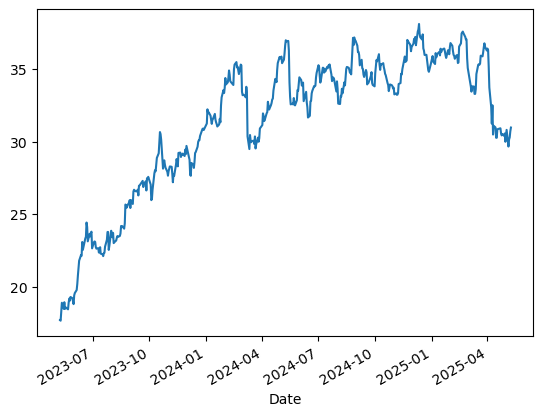

In [9]:
dados.Close.plot()

In [ ]:
# Criar um DataFrame para salvar Tabela de Dados
df = pd.DataFrame(dados)

# Salvar o DataFrame para um arquivo Excel
df.to_excel("Dados Ações da PETR4.SA.xlsx", sheet_name="Planilha1", index=False)

In [13]:
tabelas_dados = pd.read_excel("Dados Ações da PETR4.SA.xlsx")
display(tabelas_dados)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,17.565437,17.846081,17.443105,17.694965,33978200,0.0,0
1,17.694966,17.860474,17.507870,17.651791,41500700,0.0,0
2,17.363948,18.335408,17.220029,18.299429,136878100,0.0,0
3,18.407371,19.242107,18.335411,18.889503,117237500,0.0,0
4,18.752779,18.817543,18.277843,18.464939,81996700,0.0,0
...,...,...,...,...,...,...,...
495,30.570000,30.620001,29.660000,29.660000,59011700,0.0,0
496,30.110001,30.389999,29.959999,30.150000,52751300,0.0,0
497,30.299999,30.299999,29.900000,30.290001,35050400,0.0,0
498,30.590000,31.030001,30.450001,30.709999,44665000,0.0,0


<h3 style="color: #00BFFF">3. Análises Exploratória de Dados</h3>
- Tratamento de Dados

In [15]:
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-09 00:00:00-03:00,17.565437,17.846081,17.443105,17.694965,33978200,0.0,0.0
2023-05-10 00:00:00-03:00,17.694966,17.860474,17.507870,17.651791,41500700,0.0,0.0
2023-05-11 00:00:00-03:00,17.363948,18.335408,17.220029,18.299429,136878100,0.0,0.0
2023-05-12 00:00:00-03:00,18.407371,19.242107,18.335411,18.889503,117237500,0.0,0.0
2023-05-15 00:00:00-03:00,18.752779,18.817543,18.277843,18.464939,81996700,0.0,0.0


In [16]:
dados.reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-05-09 00:00:00-03:00,17.565437,17.846081,17.443105,17.694965,33978200,0.0,0.0
1,2023-05-10 00:00:00-03:00,17.694966,17.860474,17.507870,17.651791,41500700,0.0,0.0
2,2023-05-11 00:00:00-03:00,17.363948,18.335408,17.220029,18.299429,136878100,0.0,0.0
3,2023-05-12 00:00:00-03:00,18.407371,19.242107,18.335411,18.889503,117237500,0.0,0.0
4,2023-05-15 00:00:00-03:00,18.752779,18.817543,18.277843,18.464939,81996700,0.0,0.0
...,...,...,...,...,...,...,...,...
495,2025-05-05 00:00:00-03:00,30.570000,30.620001,29.660000,29.660000,59011700,0.0,0.0
496,2025-05-06 00:00:00-03:00,30.110001,30.389999,29.959999,30.150000,52751300,0.0,0.0
497,2025-05-07 00:00:00-03:00,30.299999,30.299999,29.900000,30.290001,35050400,0.0,0.0
498,2025-05-08 00:00:00-03:00,30.590000,31.030001,30.450001,30.709999,44665000,0.0,0.0


In [ ]:
treinamento = dados.reset_index()